In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA CLEANING:

In [92]:
# Load dataset
df = pd.read_csv("amazon_prime_titles.csv")

# 1. Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

# 2. Strip extra spaces from column names
df.columns = df.columns.str.strip()

# 3. Handle missing values

# Drop rows where 'title' is missing (essential field)
df.dropna(subset=['title'], inplace=True)

# Fill missing 'director', 'cast', 'country', 'rating' with 'Unknown'
for col in ['director', 'cast', 'country', 'rating']:
    df[col] = df[col].fillna("Unknown")

# Fill missing 'date_added' with 'Unknown'
df['date_added'] = df['date_added'].fillna("Unknown")

# 4. Convert date formats
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
#4.1  . Replace any null-value in the 'date_added' column with 2000-01-01 (1st January 2000)
df['date_added'] = df['date_added'].fillna("2000-01-01")

# 5. Standardize 'type' column
df['type'] = df['type'].str.strip().str.title()

# 6. Clean duration
df['duration'] = df['duration'].str.strip()

# 7. Remove unwanted symbols in text columns
text_columns = ['title', 'director', 'cast', 'listed_in', 'description']
for col in text_columns:
    df[col] = df[col].str.replace(r'[^\w\s,:\-\&\']', '', regex=True)

# 8. Convert release_year to integer
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# 9. Drop rows with invalid release_year
df = df[df['release_year'].between(1900, 2025)]

# 10. Reset index after cleaning
df.reset_index(drop=True, inplace=True)

print("✅ Data cleaned successfully!")
print(df.info())
print(df.head())

# Save cleaned dataset
#df.to_csv("amazon_prime_titles_cleaned.csv", index=False)


✅ Data cleaned successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       9668 non-null   object        
 1   type          9668 non-null   object        
 2   title         9668 non-null   object        
 3   director      9668 non-null   object        
 4   cast          9668 non-null   object        
 5   country       9668 non-null   object        
 6   date_added    9668 non-null   datetime64[ns]
 7   release_year  9668 non-null   int64         
 8   rating        9668 non-null   object        
 9   duration      9668 non-null   object        
 10  listed_in     9668 non-null   object        
 11  description   9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 906.5+ KB
None
  show_id   type                 title        director  \
0      s1  Movie   The Grand 

In [93]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# DATA ANALYSIS:

# 10 Example Data Analysis Questions
# (No answers, just prompts for analysis)





## q1> Which country has produced the most Amazon Prime titles?
## q2> How has the number of movies and TV shows changed over the years?
## q3> What are the most common genres (listed_in) in the dataset?
## q4> Who are the top 10 most frequently appearing directors?
## q5> Which actors appear most often in Amazon Prime titles?
## q6> What is the distribution of ratings (e.g., PG, R, 13+) across titles?
## q7> Which year had the highest number of new titles added to Amazon Prime?
## q8> How do average durations compare between movies and TV shows?
## q9> What are the most popular genres in the last 5 years?
## q10> Which countries dominate the production of TV shows vs. movies?

In [94]:
df.head(3)

show_id   type                 title      director  \
0      s1  Movie   The Grand Seduction  Don McKellar   
1      s2  Movie  Take Care Good Night  Girish Joshi   
2      s3  Movie  Secrets of Deception   Josh Webber   

                                                cast        country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent         Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar          India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...  United States   

  date_added  release_year   rating duration                listed_in  \
0 2021-03-30          2014  Unknown  113 min            Comedy, Drama   
1 2021-03-30          2018      13+  110 min     Drama, International   
2 2021-03-30          2017  Unknown   74 min  Action, Drama, Suspense   

                                         description  
0  A small fishing village must procure a local d...  
1  A Metro Family decides to fight a Cyber Crimin...  
2  After a man discovers his wife is cheating on ...

In [95]:
#ANSWER FOR Q1:
dataset = df["country"].value_counts().reset_index()

dataset = dataset[dataset["country"]!="Unknown"]
dataset

country  count
1                                       United States    253
2                                               India    229
3                                      United Kingdom     28
4                                              Canada     16
5                       United Kingdom, United States     12
..                                                ...    ...
82                              United States, Mexico      1
83  United States, Germany, Japan, United Kingdom,...      1
84                                      Italy, Canada      1
85                                    France, Belgium      1
86                                       Italy, Spain      1

[86 rows x 2 columns]

In [96]:
df.head(3)

show_id   type                 title      director  \
0      s1  Movie   The Grand Seduction  Don McKellar   
1      s2  Movie  Take Care Good Night  Girish Joshi   
2      s3  Movie  Secrets of Deception   Josh Webber   

                                                cast        country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent         Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar          India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...  United States   

  date_added  release_year   rating duration                listed_in  \
0 2021-03-30          2014  Unknown  113 min            Comedy, Drama   
1 2021-03-30          2018      13+  110 min     Drama, International   
2 2021-03-30          2017  Unknown   74 min  Action, Drama, Suspense   

                                         description  
0  A small fishing village must procure a local d...  
1  A Metro Family decides to fight a Cyber Crimin...  
2  After a man discovers his wife is cheating on ...

In [97]:
#ANSWER FOR Q2:
dataset = df.groupby("release_year")["title"].count().reset_index(name="No. of Contents Produced").head(100)

plt.figure(figsize=(20,8))
sns.lineplot(x="No. of Contents Produced",y="release_year",data=dataset)

<Axes: xlabel='No. of Contents Produced', ylabel='release_year'>

In [98]:
#ANSWER FOR Q3:
#ensure that 'listed_in' column has only one value per row:
# Split and explode in the same dataset so each row has only one value in 'listed_in'
# Apply directly to 'data' instead of 'df' if 'data' is your main dataset variable
df = df.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')

# Strip spaces
df['listed_in'] = df['listed_in'].str.strip()

# Reset index
df.reset_index(drop=True, inplace=True)

df.head()



show_id   type                 title      director  \
0      s1  Movie   The Grand Seduction  Don McKellar   
1      s1  Movie   The Grand Seduction  Don McKellar   
2      s2  Movie  Take Care Good Night  Girish Joshi   
3      s2  Movie  Take Care Good Night  Girish Joshi   
4      s3  Movie  Secrets of Deception   Josh Webber   

                                                cast        country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent         Canada   
1     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent         Canada   
2   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar          India   
3   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar          India   
4  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...  United States   

  date_added  release_year   rating duration      listed_in  \
0 2021-03-30          2014  Unknown  113 min         Comedy   
1 2021-03-30          2014  Unknown  113 min          Drama   
2 2021-03-30          2018      13+  110 min          Drama   
3 2021-03-30          2018      13+  110 min  International   
4 2021-03-30          2017  Unknown   74 min         Action   

                                         description  
0  A small fishing village must procure a local d...  
1  A small fishing village must procure a local d...  
2  A Metro Family decides to fight a Cyber Crimin...  
3  A Metro Family decides to fight a Cyber Crimin...  
4  After a man discovers his wife is cheating on ...

<Axes: xlabel='count', ylabel='listed_in'>

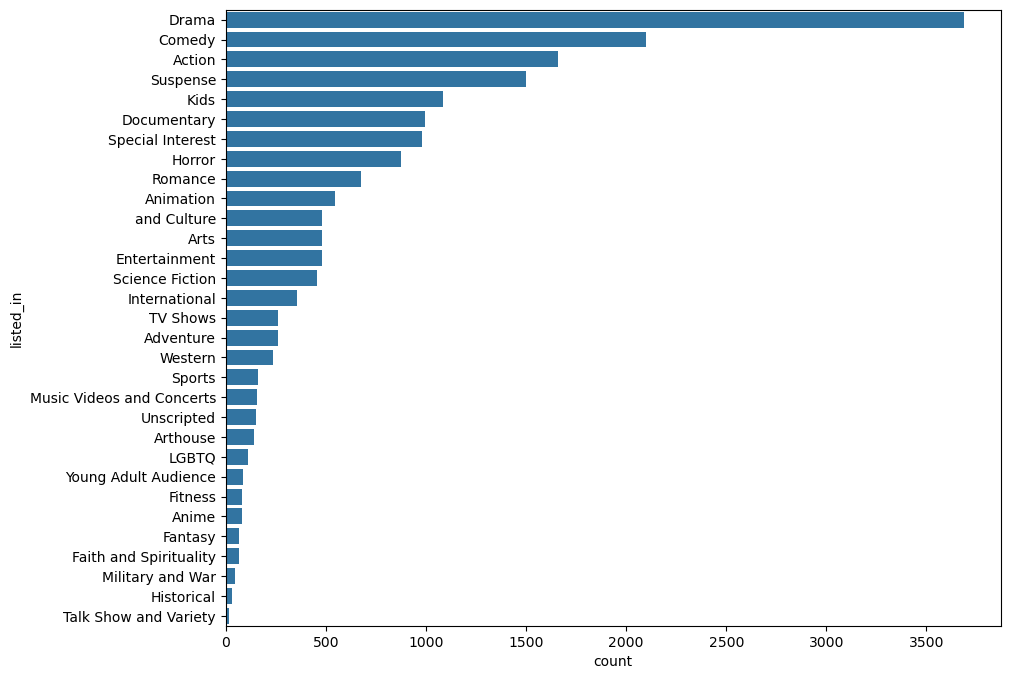

In [99]:
dataset = df["listed_in"].value_counts().reset_index()

plt.figure(figsize=(10,8))
sns.barplot(x="count",y="listed_in",data=dataset)

In [100]:
#ANSWER FOR Q4:
dataset = df["director"].value_counts().reset_index()
dataset

director  count
0               Unknown   3629
1           Jay Chapman    169
2           Mark Knight    165
3       Manny Rodriguez    108
4      Brian Volk-Weiss     71
...                 ...    ...
5764  Peter James Iengo      1
5765       Stacy Maltin      1
5766           Don Roos      1
5767  Nagulan Ponnusamy      1
5768     ZAUR DZHAFAROV      1

[5769 rows x 2 columns]

In [101]:
dataset = df[df["director"]!="Unknown"]
dataset

show_id   type                 title        director  \
0          s1  Movie   The Grand Seduction    Don McKellar   
1          s1  Movie   The Grand Seduction    Don McKellar   
2          s2  Movie  Take Care Good Night    Girish Joshi   
3          s2  Movie  Take Care Good Night    Girish Joshi   
4          s3  Movie  Secrets of Deception     Josh Webber   
...       ...    ...                   ...             ...   
18301   s9664  Movie   Pride Of The Bowery  Joseph H Lewis   
18303   s9666  Movie               Outpost    Steve Barker   
18306   s9668  Movie           Harry Brown   Daniel Barber   
18307   s9668  Movie           Harry Brown   Daniel Barber   
18308   s9668  Movie           Harry Brown   Daniel Barber   

                                                    cast        country  \
0         Brendan Gleeson, Taylor Kitsch, Gordon Pinsent         Canada   
1         Brendan Gleeson, Taylor Kitsch, Gordon Pinsent         Canada   
2       Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar          India   
3       Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar          India   
4      Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...  United States   
...                                                  ...            ...   
18301                           Leo Gorcey, Bobby Jordan        Unknown   
18303  Ray Stevenson, Julian Wadham, Richard Brake, M...        Unknown   
18306  Michael Caine, Emily Mortimer, Joseph Gilgun, ...        Unknown   
18307  Michael Caine, Emily Mortimer, Joseph Gilgun, ...        Unknown   
18308  Michael Caine, Emily Mortimer, Joseph Gilgun, ...        Unknown   

      date_added  release_year   rating duration      listed_in  \
0     2021-03-30          2014  Unknown  113 min         Comedy   
1     2021-03-30          2014  Unknown  113 min          Drama   
2     2021-03-30          2018      13+  110 min          Drama   
3     2021-03-30          2018      13+  110 min  International   
4     2021-03-30          2017  Unknown   74 min         Action   
...          ...           ...      ...      ...            ...   
18301 2000-01-01          1940       7+   60 min         Comedy   
18303 2000-01-01          2008        R   90 min         Action   
18306 2000-01-01          2010        R  103 min         Action   
18307 2000-01-01          2010        R  103 min          Drama   
18308 2000-01-01          2010        R  103 min       Suspense   

                                             description  
0      A small fishing village must procure a local d...  
1      A small fishing village must procure a local d...  
2      A Metro Family decides to fight a Cyber Crimin...  
3      A Metro Family decides to fight a Cyber Crimin...  
4      After a man discovers his wife is cheating on ...  
...                                                  ...  
18301  New York City street principles get an East Si...  
18303  In war-torn Eastern Europe, a world-weary grou...  
18306  Harry Brown, starring two-time Academy Award w...  
18307  Harry Brown, starring two-time Academy Award w...  
18308  Harry Brown, starring two-time Academy Award w...  

[14680 rows x 12 columns]

In [102]:
plt.figure(figsize=(15,8))
dataset=df["director"].value_counts().reset_index()
dataset = dataset[dataset["director"]!="Unknown"]
sns.barplot(x="count",y="director",data=dataset.head(5))

<Axes: xlabel='count', ylabel='director'>

In [103]:
#ANSWER FOR Q5:
df.head(3)

show_id   type                 title      director  \
0      s1  Movie   The Grand Seduction  Don McKellar   
1      s1  Movie   The Grand Seduction  Don McKellar   
2      s2  Movie  Take Care Good Night  Girish Joshi   

                                               cast country date_added  \
0    Brendan Gleeson, Taylor Kitsch, Gordon Pinsent  Canada 2021-03-30   
1    Brendan Gleeson, Taylor Kitsch, Gordon Pinsent  Canada 2021-03-30   
2  Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar   India 2021-03-30   

   release_year   rating duration listed_in  \
0          2014  Unknown  113 min    Comedy   
1          2014  Unknown  113 min     Drama   
2          2018      13+  110 min     Drama   

                                         description  
0  A small fishing village must procure a local d...  
1  A small fishing village must procure a local d...  
2  A Metro Family decides to fight a Cyber Crimin...

In [104]:
# Split the 'cast' column and explode
df['cast'] = df['cast'].fillna('')  # Avoid NaN issues
df = df.assign(cast=df['cast'].str.split(', ')).explode('cast').reset_index(drop=True)


In [105]:
df.head(3)

show_id   type                title      director             cast country  \
0      s1  Movie  The Grand Seduction  Don McKellar  Brendan Gleeson  Canada   
1      s1  Movie  The Grand Seduction  Don McKellar    Taylor Kitsch  Canada   
2      s1  Movie  The Grand Seduction  Don McKellar   Gordon Pinsent  Canada   

  date_added  release_year   rating duration listed_in  \
0 2021-03-30          2014  Unknown  113 min    Comedy   
1 2021-03-30          2014  Unknown  113 min    Comedy   
2 2021-03-30          2014  Unknown  113 min    Comedy   

                                         description  
0  A small fishing village must procure a local d...  
1  A small fishing village must procure a local d...  
2  A small fishing village must procure a local d...

In [106]:
dataset = df["cast"].value_counts().reset_index().head(10)
dataset = dataset[(dataset["cast"]!="Unknown") & (dataset["cast"]!="1")]

<Axes: xlabel='count', ylabel='cast'>

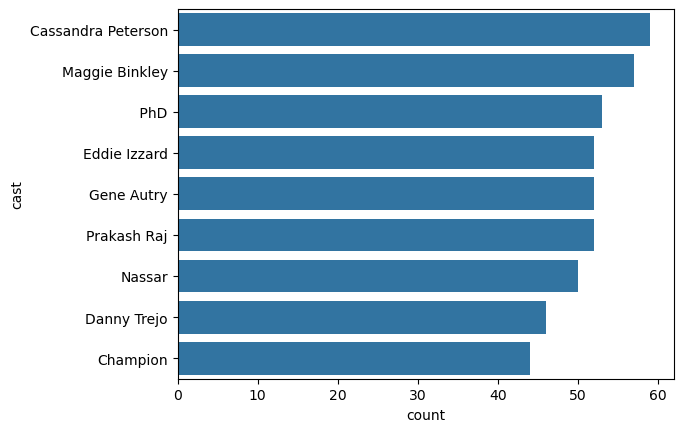

In [107]:
sns.barplot(x="count",y="cast",data=dataset)


In [108]:
#ANSWER FOR Q6:
# Q6 Fixed
dataset = df["rating"].value_counts().reset_index()
dataset = dataset[~dataset["rating"].isin(["Unknown", "UNRATED", "NOT_RATE"])]
dataset


rating  count
0        13+  21612
1        16+  14422
2        18+  11952
3          R  11021
4        ALL   6521
5      PG-13   5543
6         PG   3369
7         7+   2933
9         NR   1339
10     TV-14   1239
11     TV-PG    828
12         G    768
13     TV-MA    721
14      TV-G    593
15     TV-NR    514
16      TV-Y    395
17     TV-Y7    301
19  AGES_18_     43
20  AGES_16_     33
22     NC-17     13
23        16      3
24  ALL_AGES      1

In [109]:
#sns.histplot(x="rating",data=dataset)


plt.figure(figsize=(19,8))
sns.histplot(x="rating", data=df[~df["rating"].isin(["Unknown", "UNRATED", "NOT_RATE"])])


<Axes: xlabel='rating', ylabel='Count'>

In [110]:
#ANSWER FOR Q7:
dataset = df["release_year"].value_counts().reset_index()
dataset

release_year  count
0           2021  13637
1           2020   8497
2           2019   7716
3           2018   5554
4           2017   4294
..           ...    ...
95          1926      7
96          1922      6
97          1923      4
98          1927      4
99          1924      2

[100 rows x 2 columns]

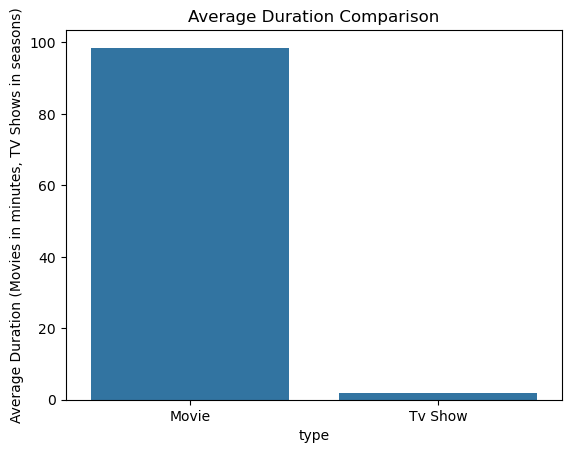

In [111]:
#ANSWER FOR Q8:
# Separate numeric values
df_movies = df[df["type"] == "Movie"].copy()
df_movies["duration_num"] = df_movies["duration"].str.replace(" min", "").astype(float)

df_tv = df[df["type"] == "Tv Show"].copy()
df_tv["duration_num"] = df_tv["duration"].str.replace(" Season", "").str.replace("s", "").astype(float)

# Calculate averages
avg_duration = pd.DataFrame({
    "type": ["Movie", "Tv Show"],
    "average_duration": [
        df_movies["duration_num"].mean(),
        df_tv["duration_num"].mean()
    ]
})

# Plot
sns.barplot(x="type", y="average_duration", data=avg_duration)
plt.ylabel("Average Duration (Movies in minutes, TV Shows in seasons)")
plt.title("Average Duration Comparison")
plt.show()


In [112]:
#ANSWER FOR Q9:

# Filter only last 5 years
last_5_years = df[df['release_year'] >= (df['release_year'].max() - 4)]

# Group by genre (listed_in) and count
popular_genres = (
    last_5_years
    .groupby('listed_in')
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

popular_genres.head(5)

listed_in  count
8      Drama   9463
6     Comedy   4713
0     Action   4097
24  Suspense   4085
14    Horror   2265

In [113]:
#ANSWER FOR Q10:
# Make sure no missing values cause issues
df['country'] = df['country'].fillna('Unknown')

# Split the 'country' column and explode into multiple rows
df['country'] = df['country'].str.split(', ')
df = df.explode('country').reset_index(drop=True)

df.head()


show_id   type                title      director             cast country  \
0      s1  Movie  The Grand Seduction  Don McKellar  Brendan Gleeson  Canada   
1      s1  Movie  The Grand Seduction  Don McKellar    Taylor Kitsch  Canada   
2      s1  Movie  The Grand Seduction  Don McKellar   Gordon Pinsent  Canada   
3      s1  Movie  The Grand Seduction  Don McKellar  Brendan Gleeson  Canada   
4      s1  Movie  The Grand Seduction  Don McKellar    Taylor Kitsch  Canada   

  date_added  release_year   rating duration listed_in  \
0 2021-03-30          2014  Unknown  113 min    Comedy   
1 2021-03-30          2014  Unknown  113 min    Comedy   
2 2021-03-30          2014  Unknown  113 min    Comedy   
3 2021-03-30          2014  Unknown  113 min     Drama   
4 2021-03-30          2014  Unknown  113 min     Drama   

                                         description  
0  A small fishing village must procure a local d...  
1  A small fishing village must procure a local d...  
2  A small fishing village must procure a local d...  
3  A small fishing village must procure a local d...  
4  A small fishing village must procure a local d...

In [114]:
dataset = df["country"].value_counts().reset_index().head(5)
dataset=dataset[dataset["country"]!="Unknown"]
dataset

country  count
1   United States   4129
2           India   3961
3  United Kingdom    717
4         Germany    465

In [115]:
# Group by country and type (Movie or TV Show), then count entries
grouped_data = df.groupby(["country", "type"]).size().reset_index(name='count')

# Separate into Movies and TV Shows
movies = grouped_data[grouped_data["type"] == "Movie"]
tv_shows = grouped_data[grouped_data["type"] == "Tv Show"]

# Sort each by count in descending order
movies_sorted = movies.sort_values(by="count", ascending=False)
tv_shows_sorted = tv_shows.sort_values(by="count", ascending=False)

# Display top 5 countries for each
print("Top 5 countries for Movies:")
movies_sorted = movies_sorted[movies_sorted["country"]!="Unknown"]
print(movies_sorted.head(5))

print("\nTop 5 countries for TV Shows:")
tv_shows_sorted = tv_shows_sorted[tv_shows_sorted["country"]!="Unknown"]
print(tv_shows_sorted.head(5))

Top 5 countries for Movies:
           country   type  count
23           India  Movie   3388
54   United States  Movie   3354
52  United Kingdom  Movie    637
19         Germany  Movie    416
7           Canada  Movie    336

Top 5 countries for TV Shows:
           country     type  count
55   United States  Tv Show    775
24           India  Tv Show    573
53  United Kingdom  Tv Show     80
47           Spain  Tv Show     59
8           Canada  Tv Show     53


<Axes: xlabel='country', ylabel='count'>

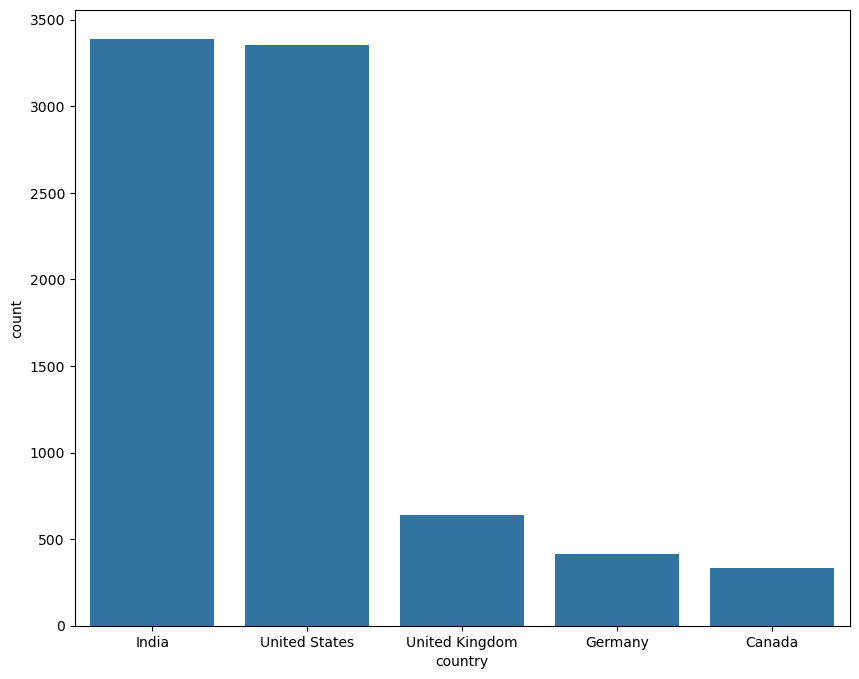

In [116]:
plt.figure(figsize=(10,8))
sns.barplot(x="country",y="count",data=movies_sorted.head(5))

In [117]:
plt.figure(figsize=(10,8))
sns.barplot(x="country",y="count",data=tv_shows_sorted.head(5))

<Axes: xlabel='country', ylabel='count'>